## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing and viewing the dataseet

In [16]:
# open up dataset using panda and view it 
data = pd.read_csv('out.csv')
data.head()

,furnishingstatus,area,bedrooms,bathrooms,stories,parking,guestroom,basement,hotwaterheating,airconditioning,mainroad,prefarea,price
0,furnished,7420.0,4.0,2.0,3.0,2.0,no,no,no,yes,yes,yes,NaN
1,furnished,NaN,4.0,4.0,4.0,3.0,no,no,no,yes,yes,no,12250000.0
2,semi-furnished,9960.0,3.0,2.0,2.0,2.0,no,yes,no,no,yes,yes,12250000.0
3,furnished,7500.0,4.0,2.0,2.0,3.0,no,NaN,no,yes,yes,yes,12215000.0
4,furnished,7420.0,4.0,1.0,2.0,2.0,yes,yes,no,yes,yes,no,11410000.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   furnishingstatus  533 non-null    object 
 1   area              533 non-null    float64
 2   bedrooms          539 non-null    float64
 3   bathrooms         536 non-null    float64
 4   stories           539 non-null    float64
 5   parking           540 non-null    float64
 6   guestroom         540 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   537 non-null    object 
 9   airconditioning   541 non-null    object 
 10  mainroad          536 non-null    object 
 11  prefarea          534 non-null    object 
 12  price             530 non-null    float64
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


### For handling duplicate data

In [6]:
# duplicate_in_student = df.duplicated(subset=['area'])
# if duplicate_in_student.any():
#     print(df.loc[~duplicate_in_student], end='\n\n')

In [7]:
# df['area'].nunique()

In [8]:
# df_dropped=df.drop_duplicates(subset=['area'], inplace=False)
# print(df_dropped)
# df_dropped.shape

In [9]:
# # for checking any unique non-null value from db like uuid
# df_dropped=df.drop_duplicates(subset=['uuid'], inplace=False)
# print(df_dropped)
# df_dropped.shape

In [10]:
# df.info()

In [11]:
# df['area']= df.astype('object').dtypes #converts area col into object

In [12]:
# df = df.infer_objects()
# df.dtypes

In [13]:
# converts to best possible python supported dtype but kinda inconvinient
# df.convert_dtypes(infer_objects=True).dtypes 

In [14]:
# df.head()

In [15]:
# df[num_col].nunique()

In [16]:
# df.shape

In [17]:
# df['furnishingstatus'].unique()
# df['furnishingstatus'].unique()[2:] #for columns with large no of outcomes

In [18]:
# df[num_col].nunique()

### Ways to simple Imputing

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Encode binary "yes"/"no" columns (e.g., 0 for 'no', 1 for 'yes')
# yes_no_cols = ['prefarea', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'mainroad']
# cols = list(df.columns)
# yes_no_cols = cat_col[1:] 
yes_no_cols = [col for col in cat_col if df[col].nunique() == 2]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode multi-category columns like "furnishingstatus" with OneHotEncoder
ct = ColumnTransformer(transformers=[('furnishingstatus_encoder', OneHotEncoder(), ['furnishingstatus'])], remainder='passthrough')
# changes furnishingstatus col to like furnishingstatus_furnished, furnishingstatus_unfurnished, furnishingstatus_semi-furnished
df = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())

ColumnTransformer is not a replacement for OneHotEncoder;
it’s a utility to apply transformations to specific columns.
In this case, it applies the OneHotEncoder to the specified categorical column and 
leaves others unchanged (remainder='passthrough').

['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'mainroad', 'prefarea']


### Feature Scaling after splitting into training and test data

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = df.drop(columns=['price'])  # Replace 'price' with your target column
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Applying Normalizer (if needed for comparison)
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_scaled)  # Normalize after scaling
X_test_normalized = normalizer.transform(X_test_scaled)


In [87]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer

# OneHotEncode multi-category columns (e.g., 'furnishingstatus')
multi_cat_cols = [col for col in cat_col if df[col].nunique() > 2]  # Multi-category columns
if multi_cat_cols:
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), multi_cat_cols)], remainder='passthrough'
    )
    df = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())
# df.columns

### Determine the dependent, independent, and Dummy variables 

In [ ]:
X= data.iloc[:, :-1].values #dependent variables
y= data.iloc[:, -1].values  #independent variable


In [ ]:
print(X)

In [ ]:
print(y)

### handling missing data

In [49]:
missing_count = data.isnull().sum().sum()

df = data.copy()

count_row = new_df.shape[0]  # Gives number of rows
count_col = new_df.shape[1]  # Gives number of columns
print(count_row, count_col)
new_df.shape

447 3


(447, 3)

In [39]:
#One option is to remove all rows including empty data
## Removing the null values
df_copy=df.dropna().reset_index(drop=True) #dropna(axis == 0)? remove rows : 1? cols
# df_copy.head()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   furnishingstatus  447 non-null    object 
 1   area              447 non-null    float64
 2   bedrooms          447 non-null    float64
 3   bathrooms         447 non-null    float64
 4   stories           447 non-null    float64
 5   mainroad          447 non-null    object 
 6   guestroom         447 non-null    object 
 7   basement          447 non-null    object 
 8   hotwaterheating   447 non-null    object 
 9   airconditioning   447 non-null    object 
 10  parking           447 non-null    float64
 11  prefarea          447 non-null    object 
 12  price             447 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.5+ KB


In [ ]:
for column in df_copy.columns:
    if df_copy[column].dtype != 'object':  # Ensure numerical columns only
        sns.displot(df_copy[column], kde=True, bins=50, height=5, aspect=1.5)
        plt.title(f"Density Plot for {column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.show()

In [1]:
new_df = df_copy[['area', 'bedrooms', 'price']].copy()
numerical_df = new_df.select_dtypes(include=['number'])
sns.pairplot(numerical_df)
new_df.info()

NameError: name 'df_copy' is not defined

<Axes: xlabel='area', ylabel='price'>

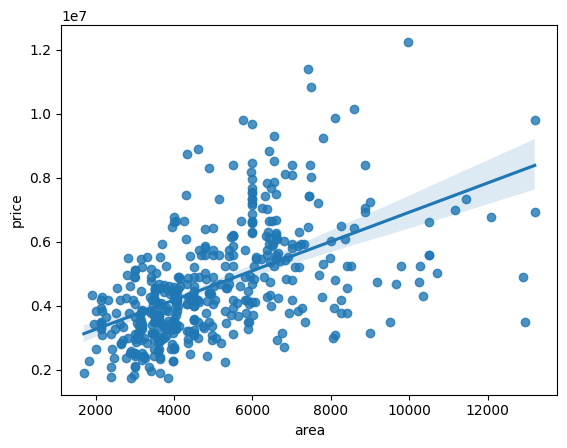

In [46]:
# new_new_df = df_copy[['bedrooms', 'price']].copy()
# sns.regplot(data=new_new_df,x="bedrooms", y="price")
sns.regplot(data=new_df,x="area", y="price")

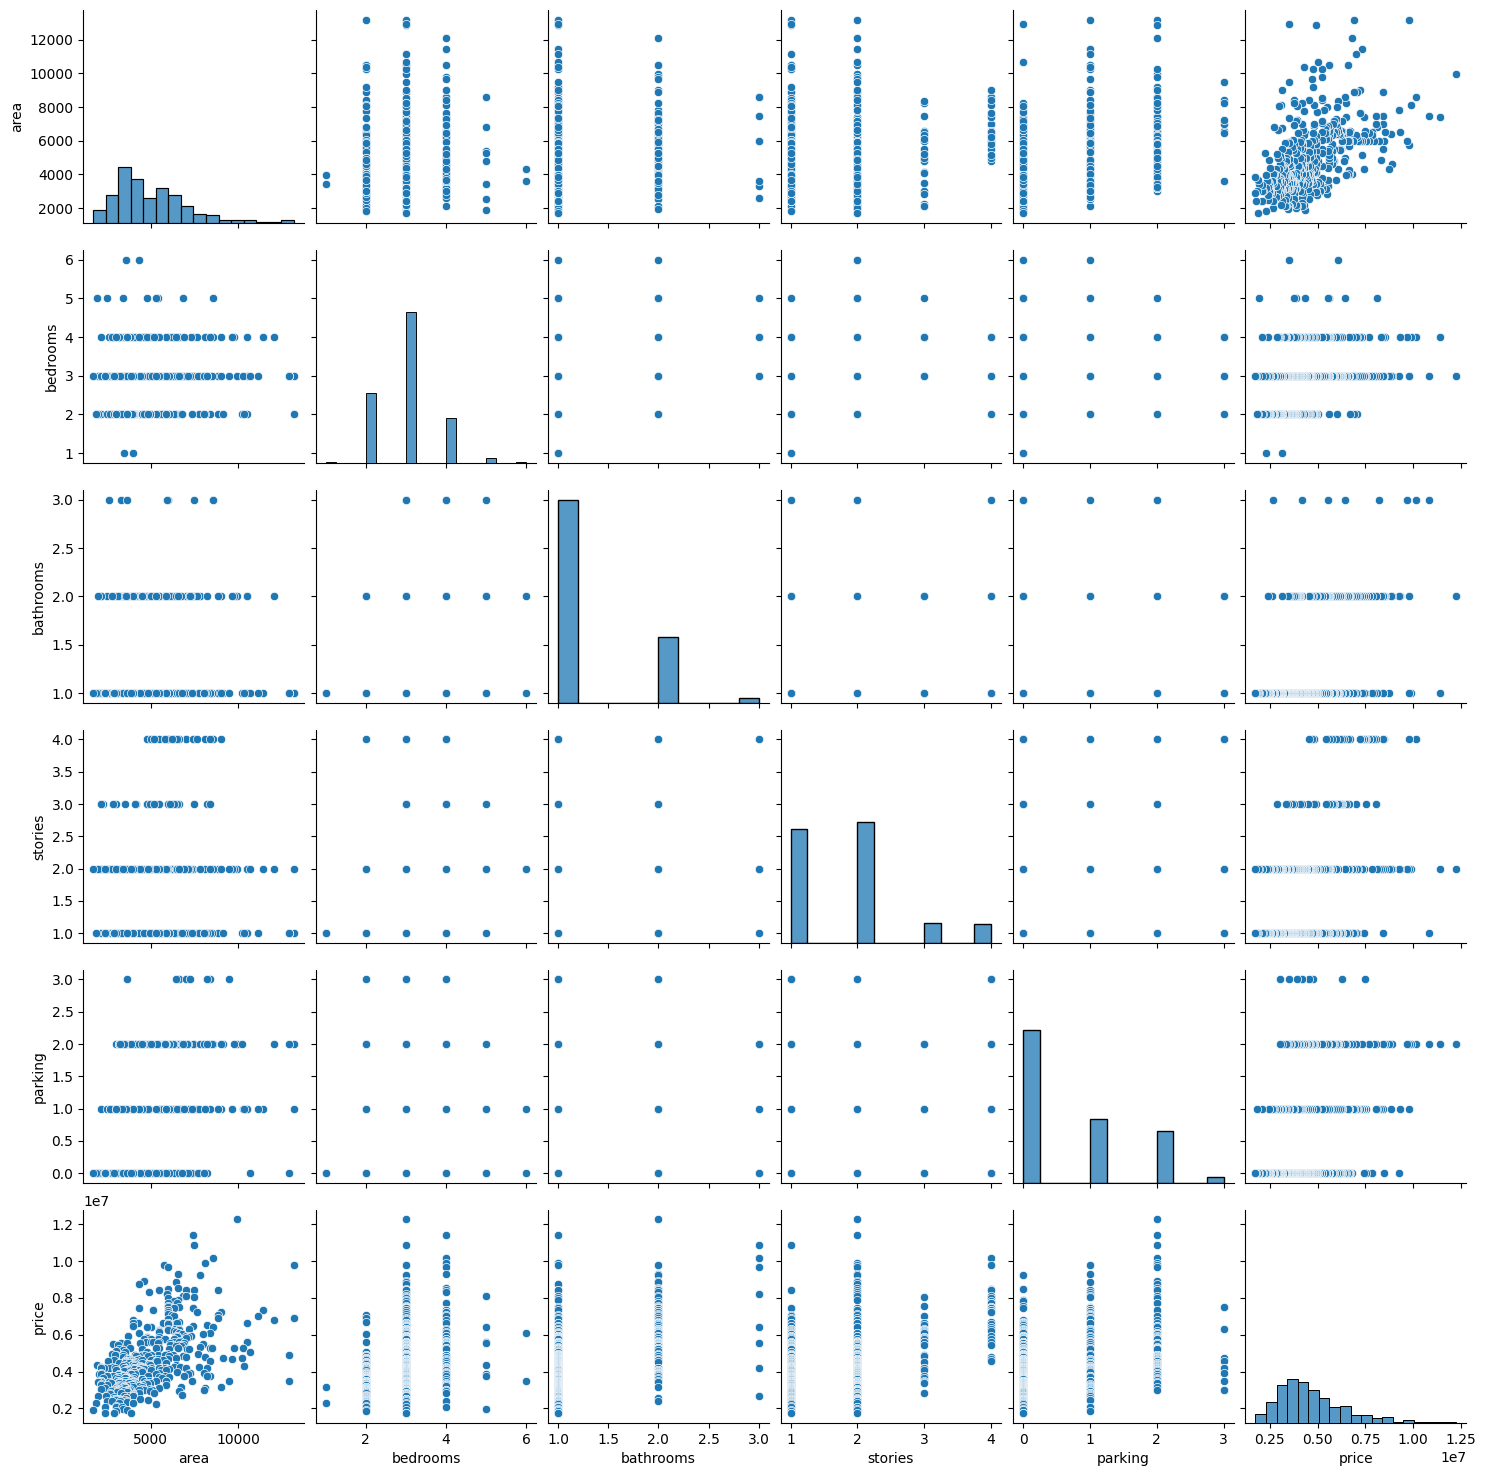

In [36]:
if df_copy[column].dtype != 'object':  # Ensure numerical columns only
    sns.pairplot(df_copy)

In [13]:
#removes whitespace in columns
df.columns=df.columns.str.strip()
df.columns

Index(['furnishingstatus', 'area', 'bedrooms', 'bathrooms', 'stories',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'price'],
      dtype='object')

In [24]:
## Percentage for Pie Chart
percentage=df_copy['guestroom'].value_counts(normalize=True)*100

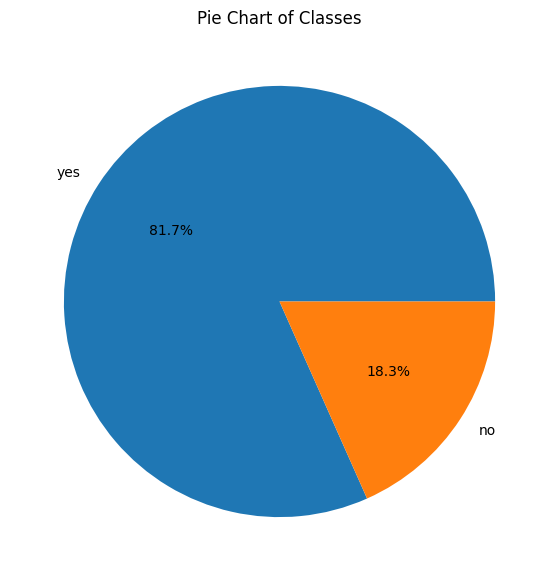

In [25]:
# plotting piechart
classlabels=["yes","no"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

Text(0, 0.5, 'Target: Price')

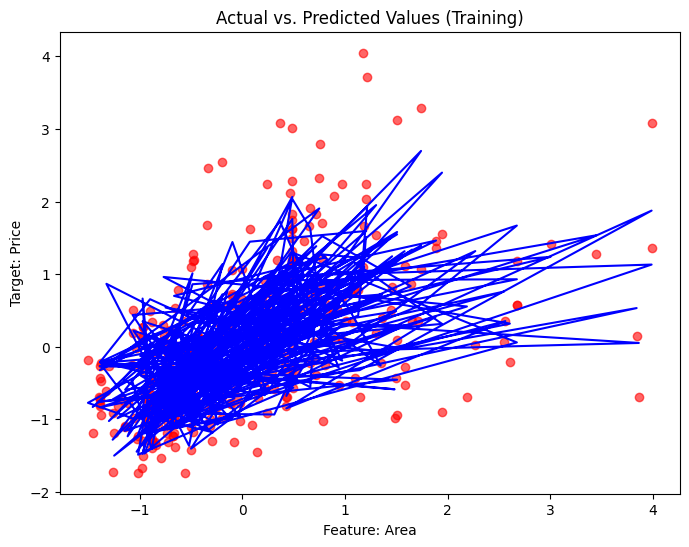

In [316]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 3], y_train, color='red', alpha=0.6, label='Training Data')
plt.plot(X_train[:, 3], regressor.predict(X_train), color='blue', label='Model Prediction')
plt.title('Actual vs. Predicted Values (Training)')
plt.xlabel('Feature: Area')
plt.ylabel('Target: Price')

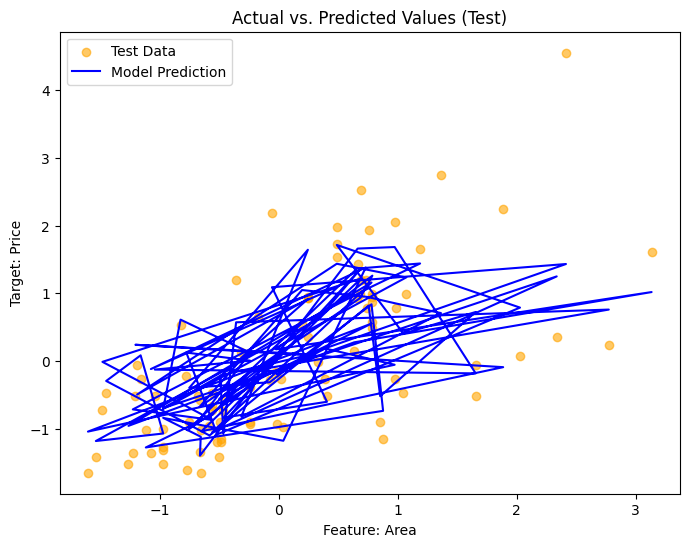

In [317]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 3], y_test, color='orange', alpha=0.6, label='Test Data')
plt.plot(X_test[:, 3], regressor.predict(X_test), color='blue', label='Model Prediction')
plt.title('Actual vs. Predicted Values (Test)')
plt.xlabel('Feature: Area')
plt.ylabel('Target: Price')
plt.legend()
plt.show()

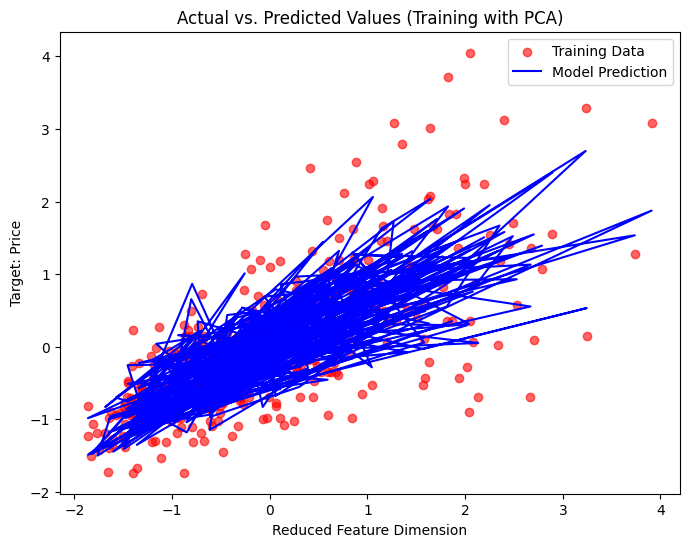

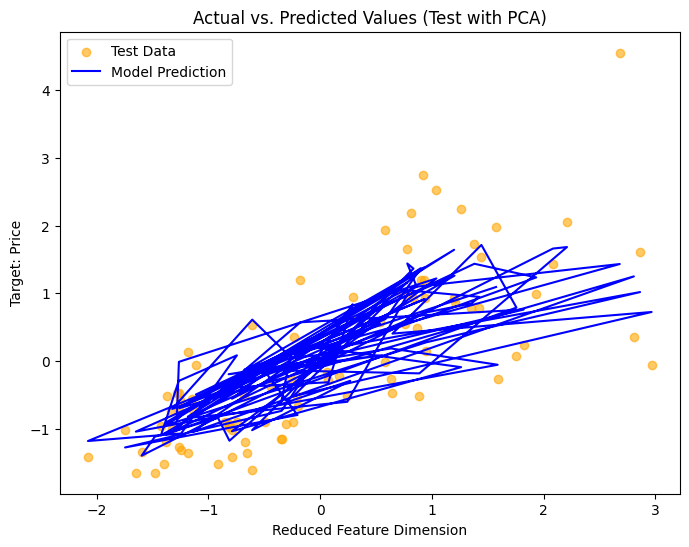

In [319]:
from sklearn.decomposition import PCA

# Reduce features to 1 dimension for visualization
pca = PCA(n_components=1)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Plot for Training Data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced, y_train, color='red', alpha=0.6, label='Training Data')
plt.plot(X_train_reduced, regressor.predict(X_train), color='blue', label='Model Prediction')
plt.title('Actual vs. Predicted Values (Training with PCA)')
plt.xlabel('Reduced Feature Dimension')
plt.ylabel('Target: Price')
plt.legend()
plt.show()

# Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_reduced, y_test, color='orange', alpha=0.6, label='Test Data')
plt.plot(X_test_reduced, regressor.predict(X_test), color='blue', label='Model Prediction')
plt.title('Actual vs. Predicted Values (Test with PCA)')
plt.xlabel('Reduced Feature Dimension')
plt.ylabel('Target: Price')
plt.legend()
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   furnishingstatus  533 non-null    object 
 1   area              533 non-null    float64
 2   bedrooms          539 non-null    float64
 3   bathrooms         536 non-null    float64
 4   stories           539 non-null    float64
 5   mainroad          536 non-null    object 
 6   guestroom         540 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   537 non-null    object 
 9   airconditioning   541 non-null    object 
 10  parking           540 non-null    float64
 11  prefarea          534 non-null    object 
 12  price             530 non-null    float64
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [14]:
df.duplicated().sum()

np.int64(0)

### Feature Scaling

In [11]:
# Standardization: Used to have feature centered around value=0 while having original distribution
# Normalization: Used to have feature scales data to a fixed range but doesn't maintain original distribution
# StandardScalar:
#     Linear Regression, Logistic Regression, Support Vector Machines, Principal Component Analysis (PCA)
# NormalScalar:
#     Neural Networks, K-Nearest Neighbors, K Means Clustering 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit to training data and transform it
X_test = scaler.transform(X_test)        # Use the same scaling on the test data

In [18]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,533.000000,539.000000,536.000000,539.000000,540.000000,5.300000e+02
mean,5128.380863,2.968460,1.285448,1.810761,0.692593,4.691346e+06
std,2118.409159,0.739818,0.502938,0.869450,0.862505,1.793101e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4560.000000,3.000000,1.000000,2.000000,0.000000,4.291000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.600000e+06
max,15600.000000,6.000000,4.000000,4.000000,3.000000,1.225000e+07


In [ ]:
# Use instead of Label encoding
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)


In [ ]:
print(data.columns)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encode binary "yes"/"no" columns (e.g., 0 for 'no', 1 for 'yes')
yes_no_cols = ['prefarea', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'mainroad']
for col in yes_no_cols:
    if col in data.columns:
        data[col] = LabelEncoder().fit_transform(data[col])

# Encode multi-category columns like "furnishingstatus" with OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['furnishingstatus'])], remainder='passthrough')
data = pd.DataFrame(ct.fit_transform(data), columns=ct.get_feature_names_out())


In [ ]:
# Impute missing values
# Use "mean" for numeric columns, "most frequent" for categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Impute numeric columns with mean
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Impute categorical columns with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])


In [ ]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)



In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
# df = pd.Dataframe(data)
plt.scatter(data['area'], data['price'])
plt.xlabel("Area")
plt.ylabel("Price")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predictions
y_pred = regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Target Value')
plt.ylabel('Predicted Target Value')
plt.show()


In [ ]:
# Impute missing values
# Use "mean" for numeric columns, "most frequent" for categorical columns
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# # Impute numeric columns with mean

# # Impute missing numeric values
# numeric_imputer = SimpleImputer(strategy='mean')
# X_train[:, numeric_cols] = numeric_imputer.fit_transform(X_train[:, numeric_cols])
# X_test[:, numeric_cols] = numeric_imputer.transform(X_test[:, numeric_cols])

# # Impute missing categorical values
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# X_train[:, cat_cols] = categorical_imputer.fit_transform(X_train[:, cat_cols])
# X_test[:, cat_cols] = categorical_imputer.transform(X_test[:, cat_cols])

In [ ]:
# Handle missing values (if any)
# imputer = SimpleImputer(strategy='mean')
# df.iloc[:, 1:6] = imputer.fit_transform(df.iloc[:, 1:6])
# df.iloc[:, -1:] = imputer.fit_transform(df.iloc[:, -1:])
# df.head()

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# print(X_train)

In [ ]:
# print(X_test)

In [ ]:
# df = pd.Dataframe(data)
# plt.scatter(data['area'], data['price'])
# plt.xlabel("Area")
# plt.ylabel("Price")

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Predictions
# y_pred = regressor.predict(X_test)

# # Evaluation
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R² Score:", r2)

# # Visualization of actual vs. predicted values
# plt.scatter(y_test, y_pred, color='blue')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
# plt.title('Actual vs. Predicted Values')
# plt.xlabel('Actual Target Value')
# plt.ylabel('Predicted Target Value')
# plt.show()
